In [1]:
import pandas as pd
import numpy as np
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt
import seaborn as sns


# Reading the English version file

In [2]:
data = pd.read_csv('EnglishV1.csv')
data = pd.DataFrame(data=data)

n = 7
# Slicing last n rows
data = data[:-n]

#data.tail(2)

# Cleaning

#### Adjusting columns names to be easily extraced by columns of interest\ days \ patient ID

In [3]:
# list of column names

cols = list(data.columns.values.tolist())

In [4]:
# extracting list of column days for each day

J0 = cols[0:21]
J1 = cols[21:42]
J2 = cols[42:63] 
J3 = cols[63:82]
J4 = cols[82:103]
J5 = cols[103:122]
J6 = cols[122:141]
J7 = cols[141:161]
J8 = cols[161:180]
J9 = cols[180:199]
J10 = cols[199:218]
J11 = cols[218:239]
J12 = cols[239:258]
J13 = cols[258:277]
J14 = cols[277:299]

In [5]:
# removing spaces and days stings


j0 = list(map(lambda x: x.replace('J0\n','').replace('J0 ',''),J0))
j1 = list(map(lambda x: x.replace('J1\n','').replace('J1 ',''),J1))
j2 = list(map(lambda x: x.replace('J2\n','').replace('J2 ',''),J2))
j3 = list(map(lambda x: x.replace('J3\n','').replace('J3 ',''),J3))
j4 = list(map(lambda x: x.replace('J4\n','').replace('J4 ',''),J4))
j5 = list(map(lambda x: x.replace('J5\n','').replace('J5 ',''),J5))


j6 = list(map(lambda x: x.replace('J6\n','').replace('J6 ',''),J6))
j7 = list(map(lambda x: x.replace('J7\n','').replace('J7 ',''),J7))
j8 = list(map(lambda x: x.replace('J8\n','').replace('J8 ',''),J8))
j9 = list(map(lambda x: x.replace('J9\n','').replace('J9 ',''),J9))
j10 = list(map(lambda x: x.replace('J10\n','').replace('J10 ',''),J10))
j11 = list(map(lambda x: x.replace('J11\n','').replace('J11 ',''),J11))


j12 = list(map(lambda x: x.replace('J12\n','').replace('J12 ',''),J12))
j13 = list(map(lambda x: x.replace('J13\n','').replace('J13 ',''),J13))
j14 = list(map(lambda x: x.replace('J14\n','').replace('J14 ',''),J14))

In [6]:
new_columns = j0+j1+j2+j3+j4+j5+j6+j7+j8+j9+j10+j11+j12+j13+j14

In [7]:
new_columns = list(map(lambda x: x.replace(' ','').replace('J12 ',''),new_columns))

In [8]:
len(new_columns)

297

In [9]:
d = data.copy()

In [10]:
d.columns = new_columns

In [11]:
#indexing the table by patient numbet

d = d.set_index('Patientnumber')

In [12]:
len(d.columns.unique())

42

In [13]:
#renaming to make columns identical as same features has different strings



d.rename(columns={'Qualityofsleep(0=bad1=excellent)':'Qualityofsleep(0-10)(0=bad;1=excellent)',
                  'Qualityofsleep(0=bad;1=excellent)':'Qualityofsleep(0-10)(0=bad;1=excellent)',
                  'Qualityofsleep(0=bad,1=excellent)': 'Qualityofsleep(0-10)(0=bad;1=excellent)'
                 }, inplace=True)

In [14]:
len(d.columns.unique())

39

In [15]:

#renaming to make columns identical as same features has different strings

d.rename(columns={'TimeReserveN°1received':'TimeReserveNo.1received', 
                  'TimeReserveNo.2Receive':'TimeReserveNo.2received',
                 'TimeReserven°3received':'TimeReserveNo.3received',
                 'TimeReserveN°2received':'TimeReserveNo.2received',
                 'TimeReserveN°3received':'TimeReserveNo.3received'}, inplace=True)

In [16]:
len(d.columns.unique())

34

In [17]:
#renaming to make columns identical as same features has different strings

d.rename(columns={'Cohen-manfieldagitationinventory':'CohenMfieldAgitationInventory'
                 }, inplace=True)

In [18]:
len(d.columns.unique())

33

In [19]:
unique_columns = d.columns.unique()

In [20]:
print('Number of unique columns : ', len(unique_columns))

Number of unique columns :  33


In [21]:
# printing last 2 patients after cleaning

d.tail(2)

,Dateofinclusion,Age,Diagnosisdementia(0=no;1=yes),MMSE(figure)/30,Patientcommunicating(0=no;1=yes),Comorbidities(numberaccordingtoCharlson),Pain(0=No;1=yes),Originalpain(1=osteoarticular;2=inflammatory;3=neurogenic;4=visceral;5=Other),"Explanation""OtherOrigin""(if5incolumnI)",OfficeAntalgie(0=No;1=Yes),...,TimeReserveNo.1received,TimeReserveNo.2received,TimeReserveNo.3received,AlgoplusSuppn°1(.=N/A),ALGOPLUSEXPERTTIME1(.=N/A),EvaPainSupply2(.=N/A),TimePainEvaSupplN°2(.=N/A),AlgoplusSuppN°2(.=N/A),TimeAlgopelusSuppln°2(.=N/A),CohenMfieldAgitationInventory
Patientnumber,,,,,,,,,,,,,,,,,,,,,
17,17/6/2021,84.0,0.0,NaN,1.0,13.0,1.0,"3,5",plaies Ulcères MI,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,8/6/2021,64.0,0.0,24.0,1.0,17.0,1.0,"1,3,4",.,1.0,...,8h20,11h30,.,.,.,4,10h,.,.,32


In [22]:
table = d.copy()



# Helper functions

In [23]:
# to extract patient row by ID

def extract_patient(ID):
     p = pd.DataFrame(d.loc[[ID]])
    
     return p
    

In [24]:
# to create 15-day series as rows for every patient for the features of interest (BVP,SLEEP,PRESSURE ....)




def create_data(filters, ID):
    
    new_df = pd.DataFrame()
    patient = extract_patient(ID)
    patient = patient.fillna('not applicable', inplace=False) #Filling empty cells by not applicable
    patient = patient.replace(['.'],'not applicable')  # replacing dot (.) cells by not applicable
    #patient = patient.replace(['not applicable'],np.nan)
    
    for i in filters:

        to_add = patient.filter(like=i).stack().values.tolist()

        
        new_df[i] = to_add
        
        new_df[i] = new_df[i].replace(['not applicable'],np.nan)  # replacing 'not applicable' by numpy NaN for numerical calculations
        
    
        
    new_df.index.name = 'Days' 
    new_df['Systolic blood pressure'] = new_df['Bloodpressure(mmhg/mmhg)'].str.extract('(\d+)')  #extract Systolic blood pressure
    new_df['Diastolic blood pressure'] = new_df['Bloodpressure(mmhg/mmhg)'].str[-2:]    # extract Diastolic blood pressure
    
    
    
    return new_df

In [25]:
#to get classes as groups (example :communicative and having dementia )


def classification(df,f1,f2,n1,n2):
    table = df.loc[(df[f1] == n1) & (df[f2] == n2)]
    return table 

In [26]:
# to get time-series tables for visualization


def tables(df):
    amazing_list = []
    for index, row in df.iterrows():
        amazing_list.append(create_data(columns_of_interest, index))
        
    return amazing_list  

In [27]:



columns_of_interest = [

                       'OfficeAntalgie(0=No;1=Yes)',
                       'Antalgieinreserve(0=no;1=yes)',
                       'Qualityofsleep(0-10)(0=bad;1=excellent)',
                       'Pulse(figure)',
                       'EVAPain(.=N/A)', 
                       'Algoplus(.=N/A)',
                        'Bloodpressure(mmhg/mmhg)',
                        'Temperature(numberC)',
                        'Frequencyresp(x/min)'
]

In [28]:
#columns_of_interest = unique_columns

In [29]:
dementia = 'Diagnosisdementia(0=no;1=yes)'
communication = 'Patientcommunicating(0=no;1=yes)'
pain = 'Pain(0=No;1=yes)'

In [30]:

# to prepare the axes for drawing visualizations



def pre_draw(pap):
    


    cols = pap.columns

    pap[cols] = pap[cols].apply(pd.to_numeric, errors='coerce')   # convert the strings cells to numerical and convert non numerical values to NaNs



    y = pap.index
    x1 = pap['EVAPain(.=N/A)']
    x2 = pap['Qualityofsleep(0-10)(0=bad;1=excellent)']
    x3 = pap['Pulse(figure)']
    x4 = pap['Frequencyresp(x/min)']
    x5 = pap['Temperature(numberC)']
    x6 = pap['Systolic blood pressure']
    x7 = pap['Diastolic blood pressure']
    x8 = pap['Antalgieinreserve(0=no;1=yes)']
     
        
    l = [y,x1,x2,x3,x4,x5,x6,x7,x8]    
    
    
    return l 

In [31]:
# visualizing 



def draw(pa):
        
    p = pre_draw(pa)    
        
    y,x1,x2,x3,x4,x5,x6,x7,x8 = p[0],p[1],p[2],p[3],p[4],p[5],p[6],p[7],p[8]
        
        
    
    sns.set_style('white')

    fig, ax1 = plt.subplots(figsize=(14,3))

    color1 = 'green'
    ax1.plot(y, x3, color=color1, lw=1)
    ax1.set_ylabel(' BVP', fontweight='bold', fontsize=15)
    #bx1.tick_params(axis='y', labelcolor=color7, labelsize=12)


    ax2 = ax1.twinx()
    color8= 'crimson'
    ax2.plot(y, x1, color=color8, lw=2)
    ax2.set_ylabel('Pain', color=color8, fontweight='bold', fontsize=18)
    ax2.tick_params(axis='y', labelcolor=color8, labelsize=12)
    ax2.spines['right'].set_color(color8)


    # __________________________________________________

    fig, bx1 = plt.subplots(figsize=(14,3))

    color6 = 'blue'
    bx1.plot(y, x6, color=color6, lw=1)
    bx1.set_ylabel('Systolic blood pressure', fontweight='bold', fontsize=12)
    #bx1.tick_params(axis='y', labelcolor=color6, labelsize=12)




    color7 = 'orange'
    bx1.plot(y, x7, color=color7, lw=1)
    bx1.set_ylabel(' Blood pressure', fontweight='bold', fontsize=15)
    #bx1.tick_params(axis='y', labelcolor=color7, labelsize=12)


    bx2 = bx1.twinx()
    color8= 'crimson'
    bx2.plot(y, x1, color=color8, lw=2)
    bx2.set_ylabel('Pain', color=color8, fontweight='bold', fontsize=18)
    bx2.tick_params(axis='y', labelcolor=color8, labelsize=12)
    bx2.spines['right'].set_color(color8)

    #.  ________________________________________


    fig, cx1 = plt.subplots(figsize=(14,3))

    color7 = 'green'
    cx1.plot(y, x5, color=color7, lw=1)
    cx1.set_ylabel(' Temperature(C)', fontweight='bold', fontsize=15)
    #bx1.tick_params(axis='y', labelcolor=color7, labelsize=12)


    cx2 = cx1.twinx()
    color8= 'crimson'
    cx2.plot(y, x1, color=color8, lw=2)
    cx2.set_ylabel('Pain', color=color8, fontweight='bold', fontsize=18)
    cx2.tick_params(axis='y', labelcolor=color8, labelsize=12)
    cx2.spines['right'].set_color(color8)

    # __________________________________

    #

    fig, dx1 = plt.subplots(figsize=(14,3))

    color7 = 'green'
    dx1.plot(y, x4, color=color7, lw=1)
    dx1.set_ylabel(' Respiratory rate (x/min)', fontweight='bold', fontsize=15)
    #bx1.tick_params(axis='y', labelcolor=color7, labelsize=12)


    dx2 = dx1.twinx()
    color8= 'crimson'
    dx2.plot(y, x1, color=color8, lw=2)
    dx2.set_ylabel('Pain', color=color8, fontweight='bold', fontsize=18)
    dx2.tick_params(axis='y', labelcolor=color8, labelsize=12)
    dx2.spines['right'].set_color(color8)


    #______________________________

    fig, ex1 = plt.subplots(figsize=(14,3))

    color70 = 'dodgerblue'
    ex1.plot(y, x2, color=color70, lw=1)
    ex1.set_ylabel(' Quality of Sleep', fontweight='bold', fontsize=15)
    #bx1.tick_params(axis='y', labelcolor=color7, labelsize=12)


    ex2 = ex1.twinx()
    color8= 'crimson'
    ex2.plot(y, x1, color=color8, lw=2)
    ex2.set_ylabel('Pain', color=color8, fontweight='bold', fontsize=18)
    ex2.tick_params(axis='y', labelcolor=color8, labelsize=12)
    ex2.spines['right'].set_color(color8)


    zx = plt.gca()
    zx.set_frame_on(False)


    plt.tight_layout()
    #plt.savefig('13twinx_figure_3axes.png', dpi=200)

In [32]:

# draw correlation coefficient matrix




def draw_corr(patient):
    
    plt.figure(figsize=(16, 6))
    corr = patient.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    cut_off = 0.3  # only show cells with abs(correlation) at least this value
    extreme_1 = 0.60  # show with a star
    extreme_2 = 0.70  # show with a second star
    extreme_3 = 0.80  # show with a third star
    mask |= np.abs(corr) < cut_off
    corr = corr[~mask]  # fill in NaN in the non-desired cells

    remove_empty_rows_and_cols = True
    if remove_empty_rows_and_cols:
        wanted_cols = np.flatnonzero(np.count_nonzero(~mask, axis=1))
        wanted_rows = np.flatnonzero(np.count_nonzero(~mask, axis=0))
        corr = corr.iloc[wanted_cols, wanted_rows]

    annot = [[f"{val:.4f}"
              + ('' if abs(val) < extreme_1 else '\n★')  # add one star if abs(val) >= extreme_1
              + ('' if abs(val) < extreme_2 else '★')  # add an extra star if abs(val) >= extreme_2
              + ('' if abs(val) < extreme_3 else '★')  # add yet an extra star if abs(val) >= extreme_3
              for val in row] for row in corr.to_numpy()]
    heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=annot, fmt='', cmap='BrBG')
    heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 18}, pad=16)
    plt.show()


# Extracting patients ( 4, 9 , 10 :18)

In [33]:
new_df = d.loc[[4,9,10,11,12,13,14,15,16,17,18]]

In [34]:
new_df

,Dateofinclusion,Age,Diagnosisdementia(0=no;1=yes),MMSE(figure)/30,Patientcommunicating(0=no;1=yes),Comorbidities(numberaccordingtoCharlson),Pain(0=No;1=yes),Originalpain(1=osteoarticular;2=inflammatory;3=neurogenic;4=visceral;5=Other),"Explanation""OtherOrigin""(if5incolumnI)",OfficeAntalgie(0=No;1=Yes),...,TimeReserveNo.1received,TimeReserveNo.2received,TimeReserveNo.3received,AlgoplusSuppn°1(.=N/A),ALGOPLUSEXPERTTIME1(.=N/A),EvaPainSupply2(.=N/A),TimePainEvaSupplN°2(.=N/A),AlgoplusSuppN°2(.=N/A),TimeAlgopelusSuppln°2(.=N/A),CohenMfieldAgitationInventory
Patientnumber,,,,,,,,,,,,,,,,,,,,,
4,4/2/2020,89.0,1.0,20.0,1.0,8.0,1.0,1,.,1.0,...,NaN,NaN,NaN,.,.,.,.,.,.,34
9,21/9/2020,86.0,1.0,17.0,1.0,8.0,0.0,"4,5",céphalées,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,15/10/2020,86.0,0.0,30.0,1.0,7.0,1.0,1,.,1.0,...,.,.,.,.,.,.,.,.,.,48
11,20/10/2020,84.0,0.0,23.0,1.0,8.0,1.0,"1,2,3",.,1.0,...,.,.,.,.,.,0,20h30,.,.,32
12,1/2/2021,78.0,0.0,16.0,1.0,8.0,1.0,"1,3",.,1.0,...,.,.,.,0,22h,0,15h45,.,.,29
13,3/3/2021,79.0,0.0,30.0,1.0,10.0,1.0,"1,2,3",.,1.0,...,.,.,.,0,14h,2,9h,0,22h,30
14,12/3/2021,91.0,0.0,26.0,1.0,5.0,1.0,"1,2",.,1.0,...,9h50,.,.,.,.,9,9h40,.,.,36
15,17/5/2021,68.0,0.0,29.0,1.0,9.0,1.0,1,.,1.0,...,.,.,.,.,.,0,14h,.,.,29
16,19/5/2021,89.0,0.0,28.0,1.0,5.0,1.0,1,.,1.0,...,.,.,.,.,.,5,11h45,.,.,33


In [35]:
slicer = tables(new_df)

## Noting that 


### patients extracted (4,9,10,11,12,13,14,15,16,17,18) are all communicative ( Patientcommunicating = 1 )

### patients (4,9) have dementia (Diagnosisdementia == 1)

### patients (10 : 18) have no dementia (Diagnosisdementia == 0)

# Visualization

## Note that Antalgie is not plotted but can be looked through the printed tables 

# Patient 4 -- many days records are missing


In [36]:
slicer[0]

,OfficeAntalgie(0=No;1=Yes),Antalgieinreserve(0=no;1=yes),Qualityofsleep(0-10)(0=bad;1=excellent),Pulse(figure),EVAPain(.=N/A),Algoplus(.=N/A),Bloodpressure(mmhg/mmhg),Temperature(numberC),Frequencyresp(x/min),Systolic blood pressure,Diastolic blood pressure
Days,,,,,,,,,,,
0,1.0,0.0,6.0,78.0,5,NaN,163/70,37,18,163,70
1,1.0,0.0,3.0,71,5,NaN,145/58,36.6,20,145,58
2,1,0,3,70,4,NaN,124/44,36.3,18,124,44
3,1,0,NaN,68,6,NaN,150/50,35.7,12,150,50
4,1,1,NaN,68,1,NaN,179/56,NaN,20,179,56
5,1,0,NaN,73,NaN,NaN,146/59,37.1,NaN,146,59
6,1,0,0,57,6,NaN,131/45,36,18,131,45
7,1,0,5,70,3,NaN,151/52,36.7,16,151,52
8,1,0,0,73,5,NaN,139/44,37,16,139,44


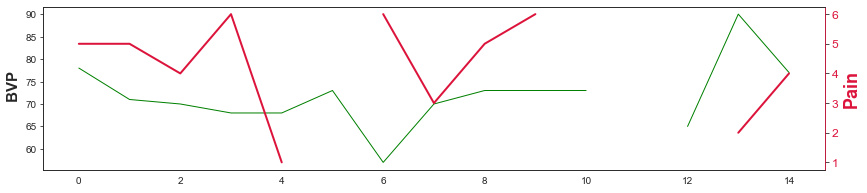

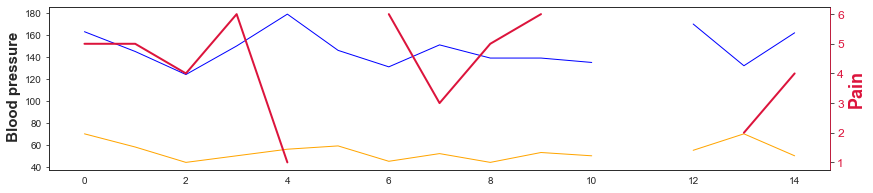

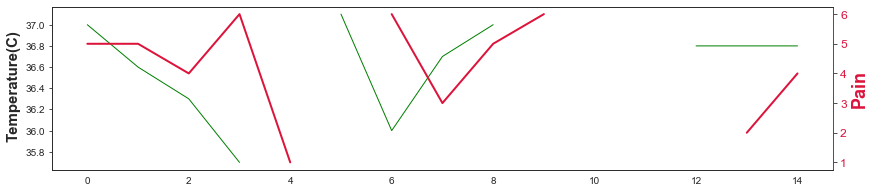

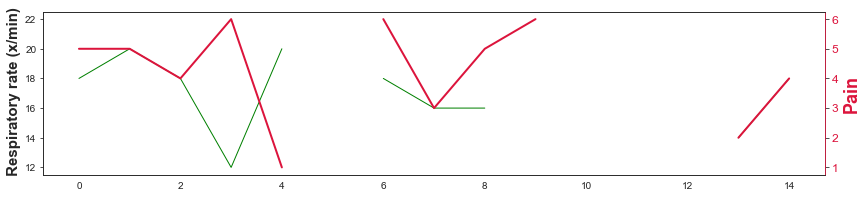

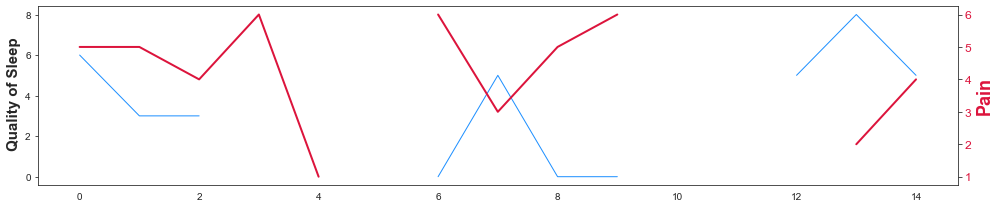

In [37]:
draw(slicer[0])

# Patient 9 -- records are not enough for visualization

In [38]:
slicer[1]

,OfficeAntalgie(0=No;1=Yes),Antalgieinreserve(0=no;1=yes),Qualityofsleep(0-10)(0=bad;1=excellent),Pulse(figure),EVAPain(.=N/A),Algoplus(.=N/A),Bloodpressure(mmhg/mmhg),Temperature(numberC),Frequencyresp(x/min),Systolic blood pressure,Diastolic blood pressure
Days,,,,,,,,,,,
0,1.0,1.0,1.0,79.0,0,NaN,152/70,36.7,20,152,70
1,1.0,1.0,1.0,93,0,NaN,150/71,36.7,20,150,71
2,1,1,1,83,0,NaN,140/67,37.3,18,140,67
3,1,1,1,82,0,NaN,139/60,36.7,24,139,60
4,NaN,NaN,NaN,stop,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


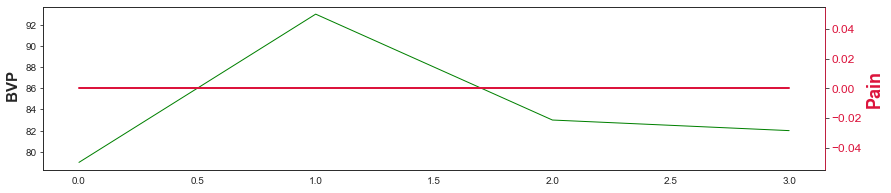

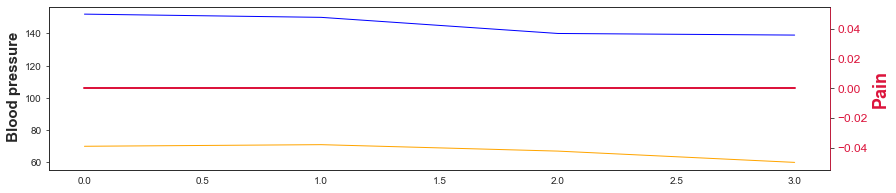

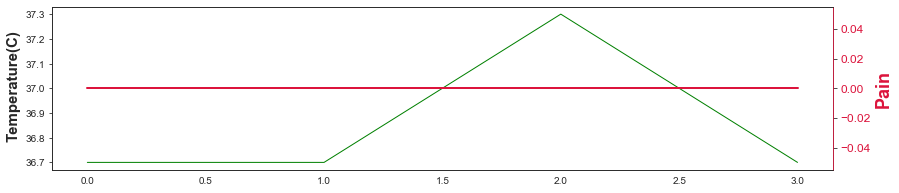

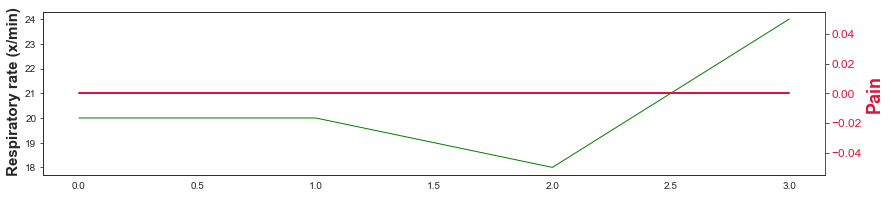

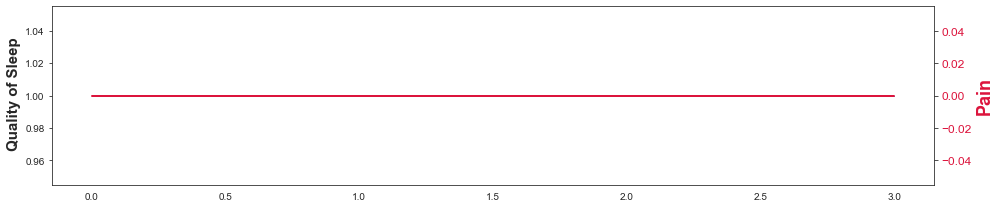

In [39]:

draw(slicer[1])

# Patient 10

### for sleep, not sure ranges are 0,1 and the first record should be converted to 1, or all records ranges are 0-10

In [40]:
slicer[2]

,OfficeAntalgie(0=No;1=Yes),Antalgieinreserve(0=no;1=yes),Qualityofsleep(0-10)(0=bad;1=excellent),Pulse(figure),EVAPain(.=N/A),Algoplus(.=N/A),Bloodpressure(mmhg/mmhg),Temperature(numberC),Frequencyresp(x/min),Systolic blood pressure,Diastolic blood pressure
Days,,,,,,,,,,,
0,1.0,1.0,5.0,61.0,7,NaN,122/61,37.2,24,122,61
1,1.0,1.0,1.0,66,0,NaN,150/70,37.1,20,150,70
2,1,1,0,60,0,NaN,144/62,NaN,NaN,144,62
3,1,1,0,61,3,NaN,103/57,36.6,NaN,103,57
4,1,1,0,68,2,NaN,122/66,36.8,19,122,66
5,1,1,1,64,3,NaN,170/77,36.8,20,170,77
6,1,1,1,63,0,NaN,142/68,37.2,16,142,68
7,1,1,0,66,10,NaN,117/56,36.9,28,117,56
8,1,1,1,73,10,NaN,127/68,37.1,18,127,68


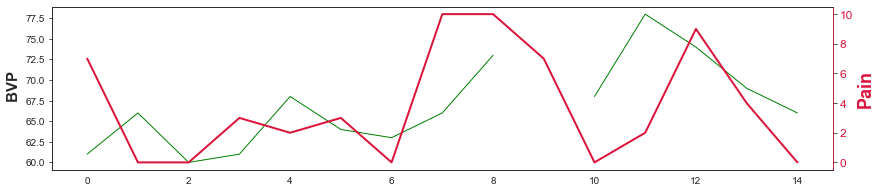

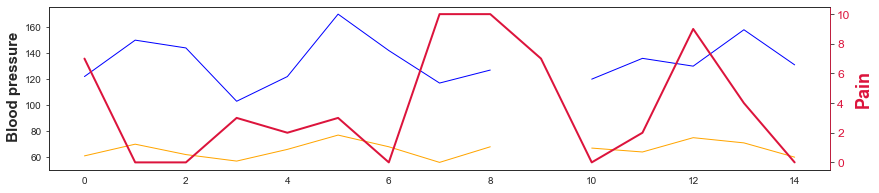

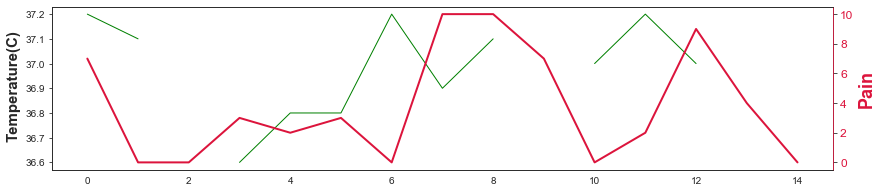

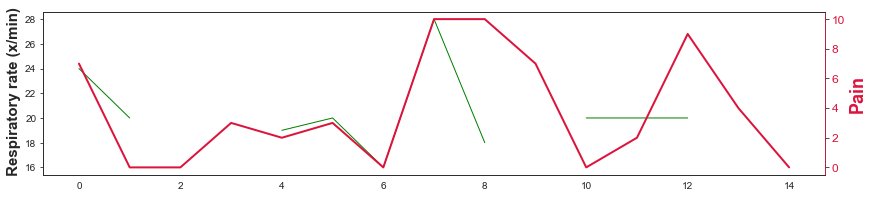

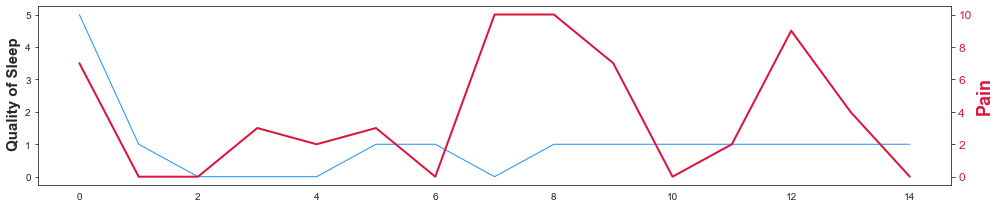

In [41]:
draw(slicer[2])

# Patient 11 - ## many missing records



## a Sleep pattern

In [42]:
slicer[3]

,OfficeAntalgie(0=No;1=Yes),Antalgieinreserve(0=no;1=yes),Qualityofsleep(0-10)(0=bad;1=excellent),Pulse(figure),EVAPain(.=N/A),Algoplus(.=N/A),Bloodpressure(mmhg/mmhg),Temperature(numberC),Frequencyresp(x/min),Systolic blood pressure,Diastolic blood pressure
Days,,,,,,,,,,,
0,1.0,1.0,1.0,74.0,0,NaN,115/69,36.6,20,115,69
1,1.0,1.0,1.0,96,0,NaN,140/70,37,16,140,70
2,1,1,1,75,0,NaN,122/78,36.6,16,122,78
3,1,1,1,73,0,NaN,128/73,36.8,20,128,73
4,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,1,1,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
6,1,1,1,73,8,NaN,112/68,36.6,NaN,112,68
7,1,1,0,72,10,NaN,120/76,36.9,20,120,76
8,1,1,0,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN


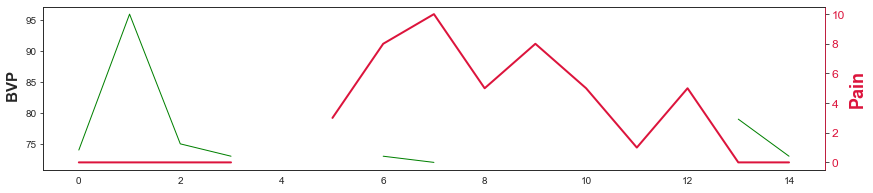

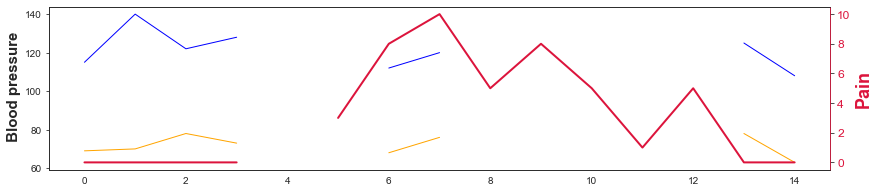

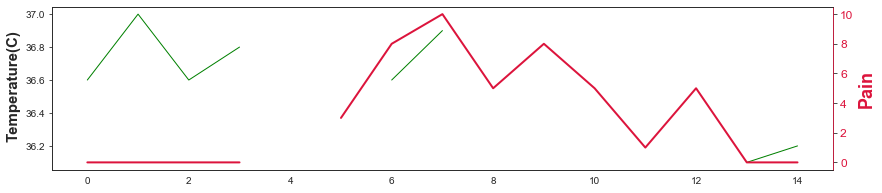

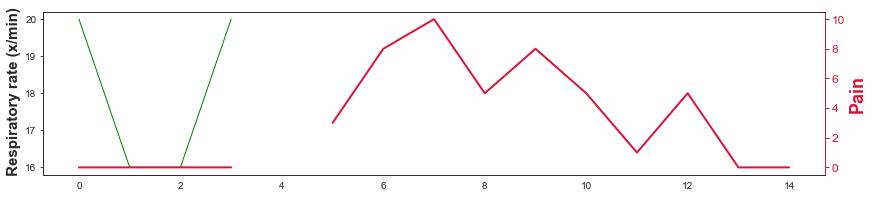

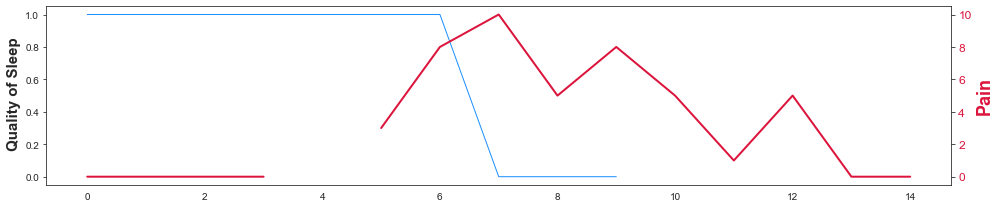

In [43]:
draw(slicer[3])

# Patient 12

In [44]:
slicer[4]

,OfficeAntalgie(0=No;1=Yes),Antalgieinreserve(0=no;1=yes),Qualityofsleep(0-10)(0=bad;1=excellent),Pulse(figure),EVAPain(.=N/A),Algoplus(.=N/A),Bloodpressure(mmhg/mmhg),Temperature(numberC),Frequencyresp(x/min),Systolic blood pressure,Diastolic blood pressure
Days,,,,,,,,,,,
0,1.0,1.0,1.0,81.0,5,4,132/65,37,22,132,65
1,1.0,1.0,1.0,80,0,0,135/60,37.2,20,135,60
2,1,1,1,66,2,1,175/74,36.3,24,175,74
3,1,1,1,75,2,3,184/84,NaN,24,184,84
4,1,1,1,NaN,2,3,NaN,NaN,NaN,NaN,NaN
5,1,1,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
6,1,1,1,88,4,2,115/56,36.6,NaN,115,56
7,1,1,1,75,0,1,121/67,NaN,NaN,121,67
8,1,1,1,95,0,2,161/77,36.8,NaN,161,77


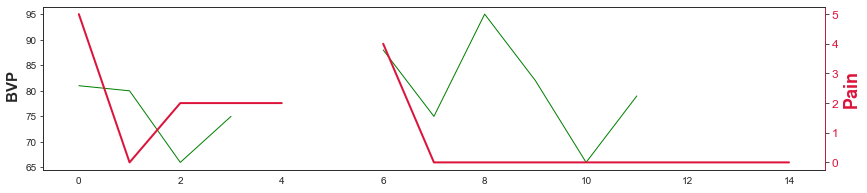

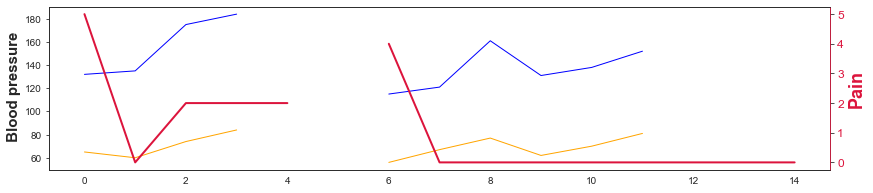

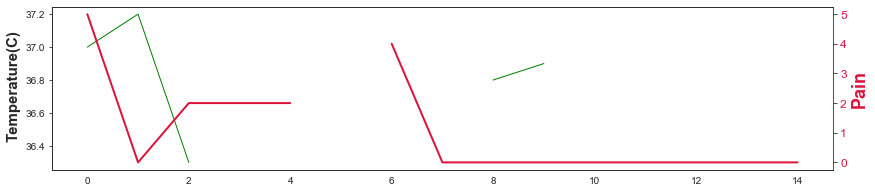

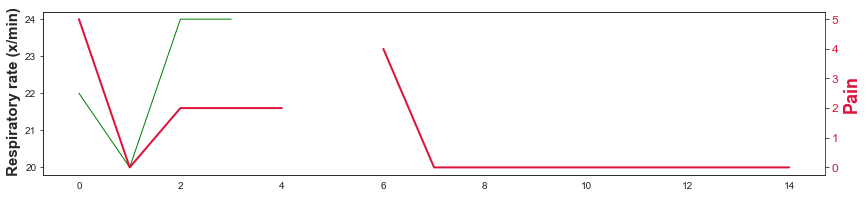

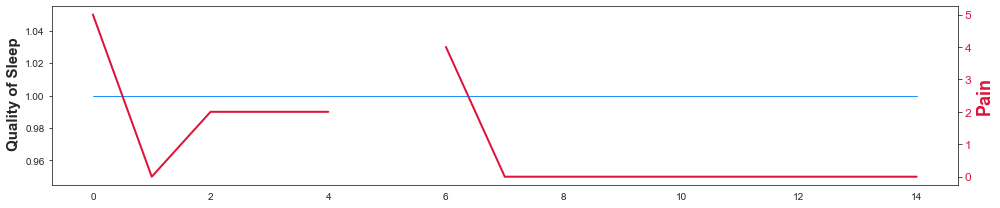

In [45]:
draw(slicer[4])

# Patient 13

## Sleep pattern in moderate pain

In [46]:
slicer[5]

,OfficeAntalgie(0=No;1=Yes),Antalgieinreserve(0=no;1=yes),Qualityofsleep(0-10)(0=bad;1=excellent),Pulse(figure),EVAPain(.=N/A),Algoplus(.=N/A),Bloodpressure(mmhg/mmhg),Temperature(numberC),Frequencyresp(x/min),Systolic blood pressure,Diastolic blood pressure
Days,,,,,,,,,,,
0,1.0,1.0,1.0,73.0,2,NaN,126/59,37.2,24,126,59
1,1.0,1.0,1.0,83,4,2,133/59,NaN,24,133,59
2,1,1,0,NaN,2,0,NaN,NaN,NaN,NaN,NaN
3,1,1,1,80,5,1,125/84,36.8,NaN,125,84
4,1,1,0,83,5,1,123/76,36.5,NaN,123,76
5,1,1,0,81,5,1,129/57,36.3,NaN,129,57
6,1,1,1,78,3,0,142/65,36.1,NaN,142,65
7,1,1,0,85,3,0,124/60,37.1,18,124,60
8,1,1,0,103,3,1,134/79,37.4,NaN,134,79


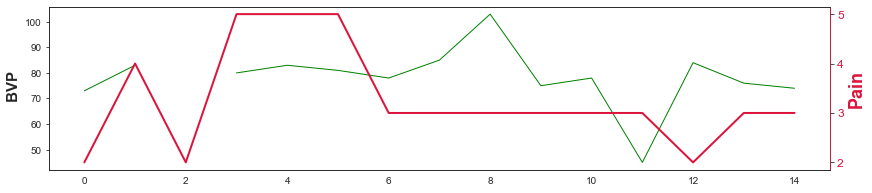

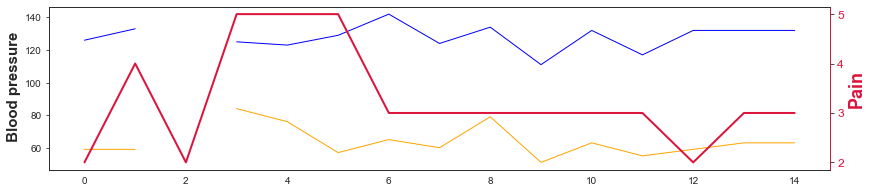

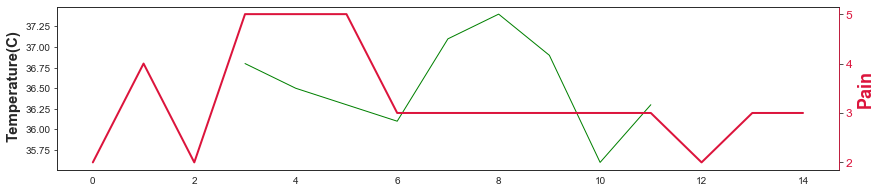

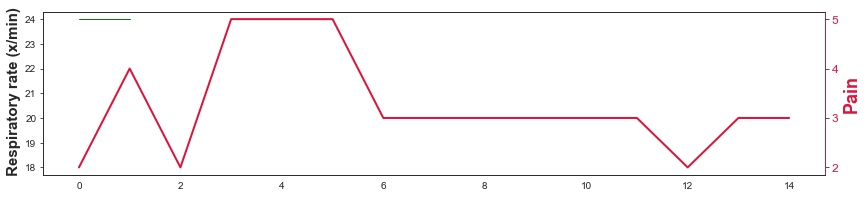

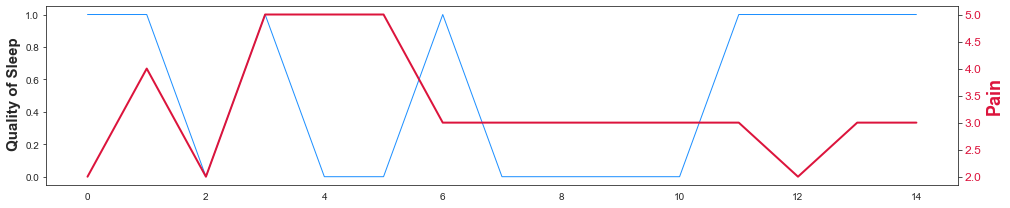

In [47]:
draw(slicer[5])

# Patient 14

## a sleep pattern in moderate to high pain 

In [48]:
slicer[6]

,OfficeAntalgie(0=No;1=Yes),Antalgieinreserve(0=no;1=yes),Qualityofsleep(0-10)(0=bad;1=excellent),Pulse(figure),EVAPain(.=N/A),Algoplus(.=N/A),Bloodpressure(mmhg/mmhg),Temperature(numberC),Frequencyresp(x/min),Systolic blood pressure,Diastolic blood pressure
Days,,,,,,,,,,,
0,1.0,1.0,0.0,86.0,7,1,149/68,36.9,20,149,68
1,1.0,1.0,0.0,NaN,5,0,NaN,NaN,NaN,NaN,NaN
2,1,1,1,NaN,0,0,NaN,NaN,NaN,NaN,NaN
3,1,1,1,NaN,0,0,NaN,NaN,NaN,NaN,NaN
4,1,1,1,86,2,0,157/81,36.9,NaN,157,81
5,1,1,1,NaN,0,0,NaN,NaN,NaN,NaN,NaN
6,1,1,1,NaN,0,0,NaN,NaN,NaN,NaN,NaN
7,1,1,0,79,8,1,160/70,36.6,NaN,160,70
8,1,1,1,95,0,0,123/68,37.2,NaN,123,68


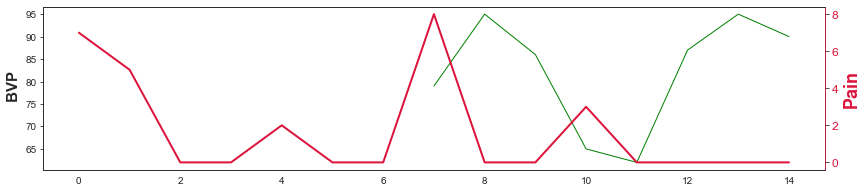

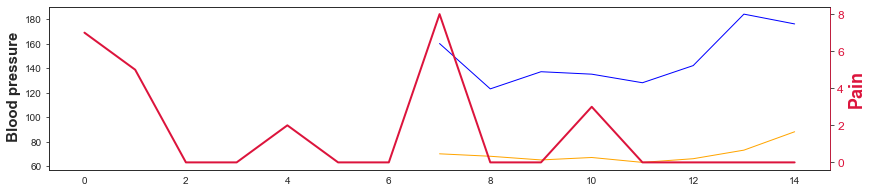

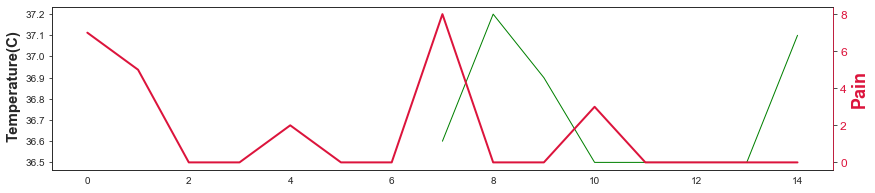

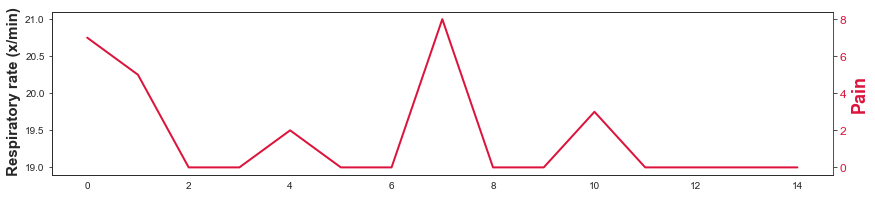

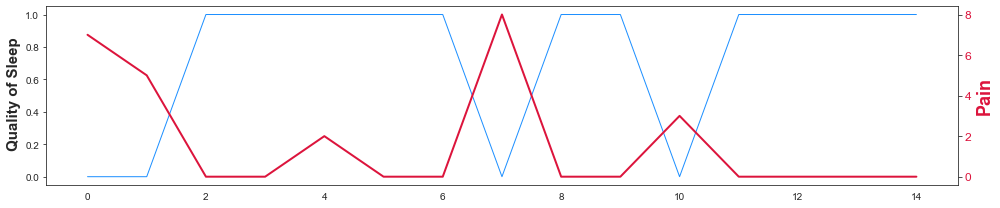

In [49]:
draw(slicer[6])

# Patient 15

## Sleep pattern in moderate pain 

In [50]:
slicer[7]

,OfficeAntalgie(0=No;1=Yes),Antalgieinreserve(0=no;1=yes),Qualityofsleep(0-10)(0=bad;1=excellent),Pulse(figure),EVAPain(.=N/A),Algoplus(.=N/A),Bloodpressure(mmhg/mmhg),Temperature(numberC),Frequencyresp(x/min),Systolic blood pressure,Diastolic blood pressure
Days,,,,,,,,,,,
0,1.0,1.0,1.0,66.0,0,NaN,144/75,36.7,18,144,75
1,1.0,1.0,1.0,80,3,NaN,132/78,36,18,132,78
2,1,1,1,60,3,NaN,133/75,36.7,NaN,133,75
3,1,1,1,70,2,NaN,131/88,36.5,NaN,131,88
4,1,1,1,91,0,NaN,139/69,36.1,NaN,139,69
5,1,1,1,79,3,NaN,144/70,36.7,18,144,70
6,1,1,1,66,5,NaN,127/70,36.6,NaN,127,70
7,1,1,1,68,0,NaN,127/61,36.6,NaN,127,61
8,1,1,1,93,0,NaN,138/64,36.8,NaN,138,64


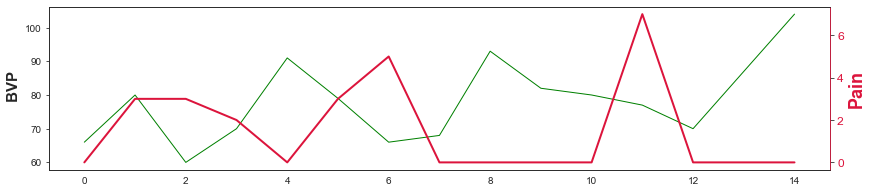

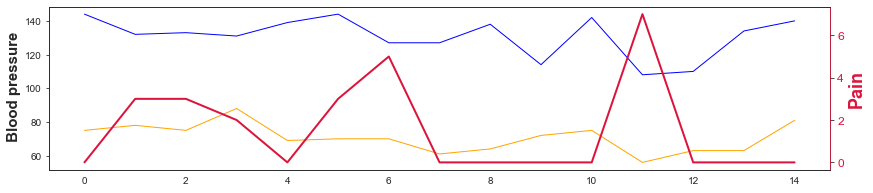

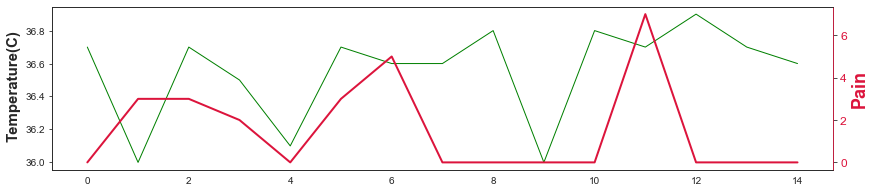

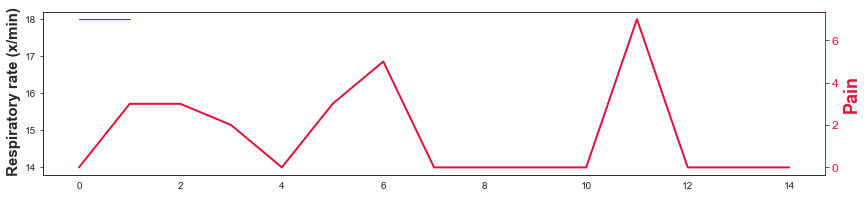

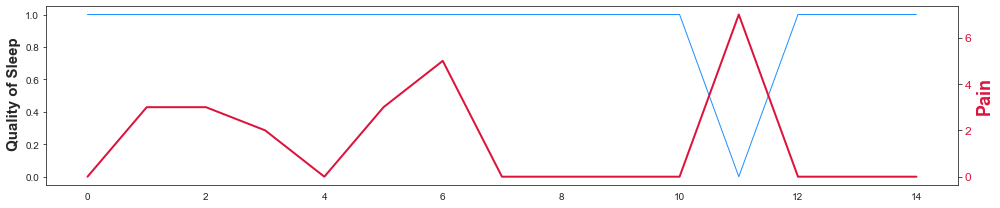

In [51]:
draw(slicer[7])

# Patient 16

In [52]:
slicer[8]

,OfficeAntalgie(0=No;1=Yes),Antalgieinreserve(0=no;1=yes),Qualityofsleep(0-10)(0=bad;1=excellent),Pulse(figure),EVAPain(.=N/A),Algoplus(.=N/A),Bloodpressure(mmhg/mmhg),Temperature(numberC),Frequencyresp(x/min),Systolic blood pressure,Diastolic blood pressure
Days,,,,,,,,,,,
0,1.0,1.0,1.0,79.0,6,NaN,139/69,37.1,20,139,69
1,1.0,1.0,1.0,70,5,NaN,178/86,37,NaN,178,86
2,1,1,0,72,6,NaN,142/72,37,NaN,142,72
3,1,1,0,83,2,NaN,152/66,36.7,NaN,152,66
4,1,1,0,83,5,NaN,133/62,36.7,NaN,133,62
5,1,1,0,84,5,NaN,128/63,37.1,NaN,128,63
6,1,1,0,70,6,NaN,177/78,36.7,NaN,177,78
7,1,1,0,65,5,NaN,122/102,37,NaN,122,02
8,1,1,0,62,6,NaN,156/73,36.8,NaN,156,73


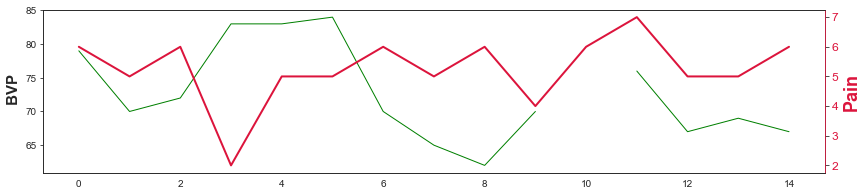

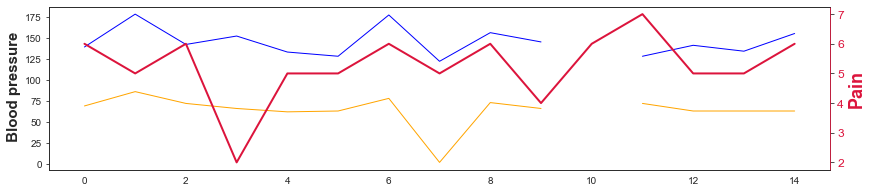

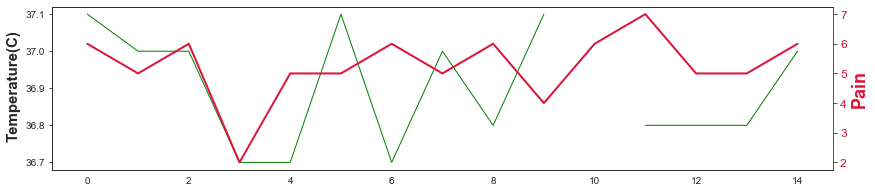

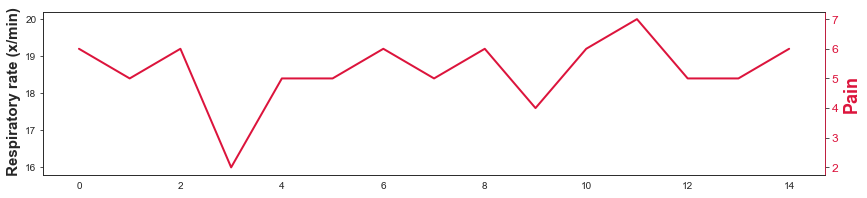

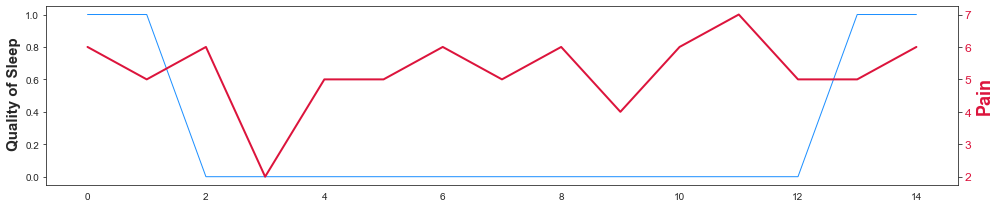

In [53]:
draw(slicer[8])

# Patient 17

## BVP pattern in moderate pain

In [54]:
slicer[9]

,OfficeAntalgie(0=No;1=Yes),Antalgieinreserve(0=no;1=yes),Qualityofsleep(0-10)(0=bad;1=excellent),Pulse(figure),EVAPain(.=N/A),Algoplus(.=N/A),Bloodpressure(mmhg/mmhg),Temperature(numberC),Frequencyresp(x/min),Systolic blood pressure,Diastolic blood pressure
Days,,,,,,,,,,,
0,1.0,1.0,1.0,74.0,4,NaN,158/67,NaN,NaN,158,67
1,1.0,1.0,1.0,80,6,NaN,142/66,NaN,NaN,142,66
2,1,1,0,72,4,NaN,118/58,37,NaN,118,58
3,1,1,1,81,7,NaN,134/55,36.8,NaN,134,55
4,1,1,0,75,7,NaN,123/58,36.8,15,123,58
5,1,1,0,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN
6,1,1,0,69,4,NaN,141/70,36.7,15,141,70
7,1,1,0,55,2,NaN,132/58,36.7,NaN,132,58
8,1,1,0,86,7,NaN,115/56,37.4,NaN,115,56


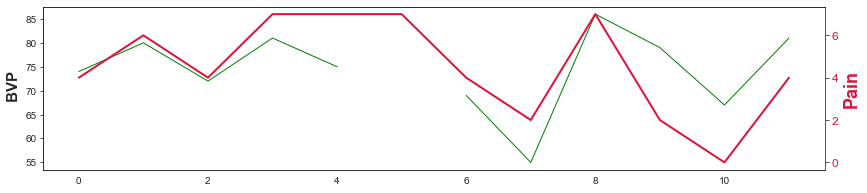

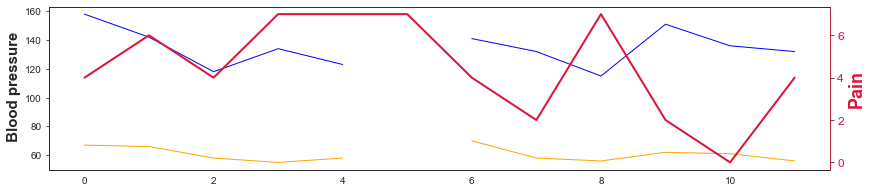

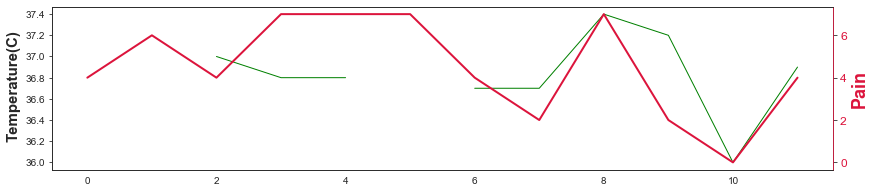

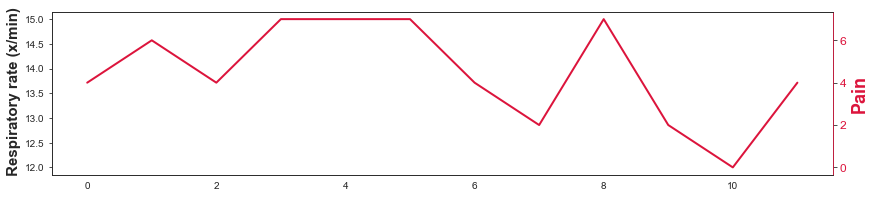

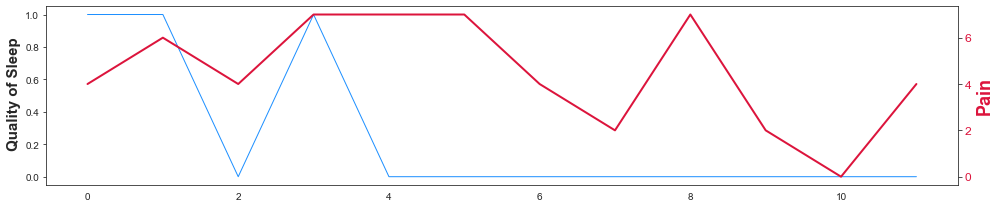

In [55]:
draw(slicer[9])

# Patient 18

## BVP and sleep patterns

In [56]:
slicer[10]

,OfficeAntalgie(0=No;1=Yes),Antalgieinreserve(0=no;1=yes),Qualityofsleep(0-10)(0=bad;1=excellent),Pulse(figure),EVAPain(.=N/A),Algoplus(.=N/A),Bloodpressure(mmhg/mmhg),Temperature(numberC),Frequencyresp(x/min),Systolic blood pressure,Diastolic blood pressure
Days,,,,,,,,,,,
0,1.0,1.0,0.0,85.0,2,NaN,126/68,36.8,20,126,68
1,1.0,1.0,0.0,98,6,NaN,127/58,37.1,18,127,58
2,1,1,0,85,3,NaN,124/74,36.9,NaN,124,74
3,1,1,1,88,3,NaN,129/73,36.6,NaN,129,73
4,1,1,1,100,1,NaN,102/60,36.5,NaN,102,60
5,1,1,1,100,3,NaN,116/56,37,15,116,56
6,1,1,1,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
7,1,1,0,96,6,NaN,111/55,37.1,NaN,111,55
8,1,1,1,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN


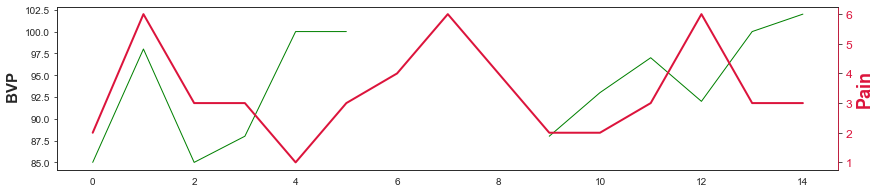

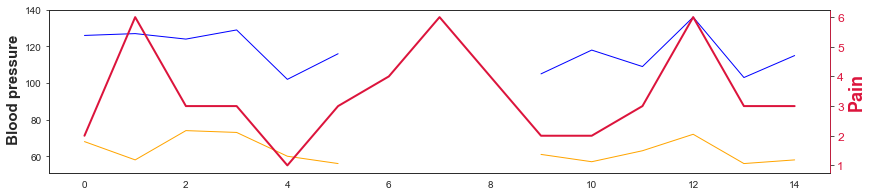

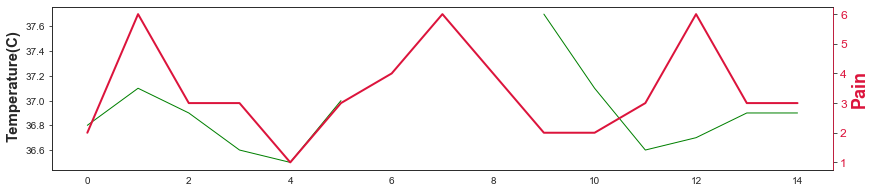

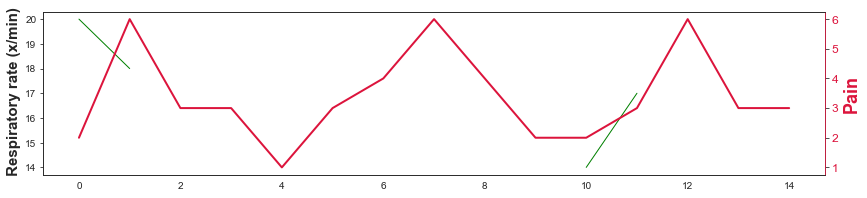

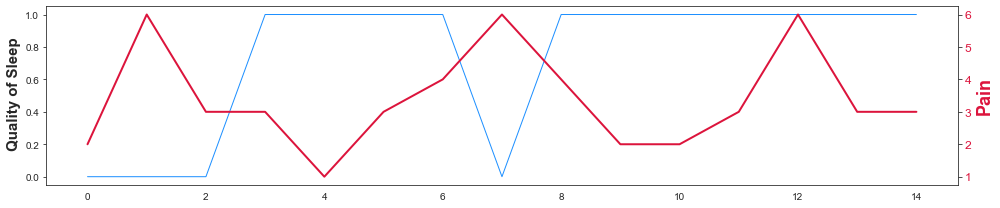

In [57]:
draw(slicer[10])